# Preprocesamiento de Datos para el Dataset de Airbnb en Málaga

Este notebook realiza el preprocesamiento del dataset de Airbnb en Málaga. El objetivo es limpiar y preparar los datos para el análisis de inversión inmobiliaria. Los pasos incluyen:

1. Cargar el dataset y realizar una exploración inicial.
2. Corrección de tipos de datos y valores inconsistentes.
3. Manejo de valores nulos y outliers.
4. Validación final para garantizar la calidad del dataset.

El dataset limpio se exportará para su uso en análisis posteriores.

In [1]:
# Importar librerías
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Cargar el Dataset

Cargar el dataset de Airbnb en Málaga y mostrar información básica.

In [2]:
# Cargar el dataset
df = pd.read_csv(r'/Users/patriciajaquez/Documents/Documents - Patricia’s MacBook Pro/GitHub/Analisis-de-inversion-inmobiliario/data/malaga_raw.csv')

# Mostrar las primeras filas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,estimated_revenue_l365d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,96033,https://www.airbnb.com/rooms/96033,20250328164700,2025-03-29,city scrape,"Bonito piso a 200m de la playa, El Palo (Málaga)",Do you have a backpacker spirit and are lookin...,"200 metres from the beaches of El Palo, Malaga...",https://a0.muscache.com/pictures/hosting/Hosti...,510467,https://www.airbnb.com/users/show/510467,Rafael,2011-04-15,"Andalusia, Spain",¡Hola! Gracias por acercarte a nosotros y enca...,within an hour,100%,100%,f,https://a0.muscache.com/im/pictures/user/59fb2...,https://a0.muscache.com/im/pictures/user/59fb2...,NaN,1,1,"['email', 'phone']",t,t,"Málaga, Andalusia, Spain",Este,NaN,36.720310,-4.356270,Entire rental unit,Entire home/apt,3,1.0,1 bath,2.0,2.0,"[""High chair"", ""Coffee"", ""Conditioner"", ""Dishe...",$54.00,3,180,3,3,1125,1125,3.0,1125.0,NaN,t,14,37,48,259,2025-03-29,250,39,1,172,37,234,12636.0,2013-10-18,2025-03-01,4.60,4.71,4.61,4.88,4.93,4.43,4.59,VUT/MA/22043,f,1,1,0,0,1.79
1,166473,https://www.airbnb.com/rooms/166473,20250328164700,2025-03-29,city scrape,Perfect Location In Malaga,This apartment is rented out by the room - new...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,793360,https://www.airbnb.com/users/show/793360,Fred,2011-07-08,"El Faro, Spain","Hi All, my name is Fred and I am half Swedish ...",within a few hours,100%,72%,f,https://a0.muscache.com/im/pictures/user/f2d8a...,https://a0.muscache.com/im/pictures/user/f2d8a...,NaN,5,5,"['email', 'phone']",t,t,NaN,Este,NaN,36.720310,-4.361080,Private room in rental unit,Private room,1,2.0,2 shared baths,1.0,4.0,"[""Dryer"", ""Dishes and silverware"", ""Private en...",$22.00,5,365,5,5,365,1000,5.0,480.7,NaN,t,0,0,26,301,2025-03-29,101,4,0,214,6,40,880.0,2011-08-25,2025-02-11,4.72,4.60,4.50,4.83,4.91,4.80,4.72,NaN,f,5,1,4,0,0.61
2,330760,https://www.airbnb.com/rooms/330760,20250328164700,2025-03-29,city scrape,Malaga Lodge Guesthouse Double room-shared bath.,The Lodge is set in a charming town house in L...,Málaga Lodge is situated next to the famous Sa...,https://a0.muscache.com/pictures/85419390/38a9...,1687526,https://www.airbnb.com/users/show/1687526,Mayte,2012-02-02,Spain,"Dear guest,\nMy name is Mayte Moreno Higgins. ...",within an hour,100%,100%,f,https://a0.muscache.com/im/users/1687526/profi...,https://a0.muscache.com/im/users/1687526/profi...,NaN,7,9,"['email', 'phone']",t,t,"Málaga, Andalusia, Spain",Centro,NaN,36.729786,-4.413462,Private room in townhouse,Private room,2,1.5,1.5 shared baths,1.0,1.0,"[""Coffee"", ""Paid dryer \u2013 In building"", ""L...",$51.00,1,1125,1,1,365,365,1.0,365.0,NaN,t,12,20,43,218,2025-03-29,60,5,

## Añadir Columna 'city' para Consistencia

Para asegurar la consistencia entre los diferentes datasets del proyecto (Madrid, Valencia, Barcelona y Málaga), se añadió una columna llamada `city` al final del dataset. Esta columna contiene el valor `'Malaga'` para todas las filas, permitiendo así identificar fácilmente la ciudad de origen de cada registro durante el análisis conjunto de los datos.

Esta práctica facilita la integración y comparación de los datos entre distintas ciudades, y es especialmente útil en procesos de concatenación o análisis multiciudad.

In [3]:
# Añadir una columna de ciudad al final del dataset para consistencia con los datasets de Madrid, Valencia y Barcelona del proyecto
df['city'] = 'Malaga'

## Descripción del Dataset

Mostrar información básica del dataset, incluyendo nombres de columnas, tipos de datos y valores nulos.

In [4]:
# Imprimir nombre de las columnas del dataset
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [5]:
# Mostrar información general del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9621 entries, 0 to 9620
Data columns (total 80 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            9621 non-null   int64  
 1   listing_url                                   9621 non-null   object 
 2   scrape_id                                     9621 non-null   int64  
 3   last_scraped                                  9621 non-null   object 
 4   source                                        9621 non-null   object 
 5   name                                          9621 non-null   object 
 6   description                                   9395 non-null   object 
 7   neighborhood_overview                         4309 non-null   object 
 8   picture_url                                   9621 non-null   object 
 9   host_id                                       9621 non-null   i

In [6]:
# Mostrar estadísticas descriptivas
pd.set_option('display.float_format', '{:.2f}'.format)
df.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,estimated_revenue_l365d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,9621.00,9621.00,9621.00,9621.00,9621.00,0.00,9621.00,9621.00,9621.00,8709.00,9432.00,8713.00,9621.00,9621.00,9621.00,9621.00,9621.00,9621.00,9621.00,9621.00,0.00,9621.00,9621.00,9621.00,9621.00,9621.00,9621.00,9621.00,9621.00,9621.00,9621.00,8711.00,8454.00,8454.00,8454.00,8454.00,8454.00,8454.00,8454.00,9621.00,9621.00,9621.00,9621.00,8454.00
mean,635269545445930624.00,20250328164700.00,217369091.31,44.49,57.69,NaN,36.72,-4.42,3.93,1.30,1.65,2.52,3.41,516.34,3.31,7.36,609.84,715.49,4.69,658.83,NaN,8.78,21.02,35.77,162.15,46.33,12.74,0.87,128.86,12.49,73.36,9183.27,4.64,4.70,4.68,4.75,4.78,4.70,4.58,24.36,22.74,1.61,0.01,1.40
std,526289589621325824.00,0.00,194649715.98,103.06,170.31,NaN,0.01,0.02,2.15,0.69,1.19,2.00,12.88,422.34,11.74,20.29,461.08,432.97,12.53,429.35,NaN,8.82,18.71,29.29,123.70,79.12,17.85,1.54,95.12,18.18,85.42,29081.81,0.43,0.40,0.41,0.38,0.37,0.37,0.44,41.50,41.38,5.35,0.27,1.48
min,96033.00,20250328164700.00,45553.00,1.00,1.00,NaN,36.65,-4.58,1.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.01
25%,42222753.00,20250328164700.00,48429489.00,2.00,2.00,NaN,36.72,-4.43,2.00,1.00,1.00,1.00,1.00,180.00,1.00,2.00,90.00,365.00,2.00,365.00,NaN,0.00,1.00,2.00,36.00,3.00,1.00,0.00,26.00,0.00,6.00,630.00,4.53,4.63,4.56,4.69,4.72,4.59,4.48,2.00,1.00,0.00,0.00,0.35
50%,773102203959943936.00,20250328164700.00,142022277.00,8.00,9.00,NaN,36.72,-4.42,4.00,1.00,1.00,2.00,2.00,365.00,2.00,4.00,365.00,999.00,2.90,637.30,NaN,7.00,18.00,34.00,164.00,15.00,5.00,0.00,140.00,5.00,36.00,3696.00,4.75,4.81,4.79,4.86,4.88,4.80,4.67,5.00,4.00,0.00,0.00,0.91
75%,1131137775001653888.00,20250328164700.00,382146507.00,48.00,58.00,NaN,36.73,-4.42,5.00,1.50,2.00,3.00,3.00,1125.00,2.00,5.00,1125.00,1125.00,4.00,1125.00,NaN,14.00,35.00,60.00,272.00,53.00,18.00,1.00,214.00,17.00,120.00,11400.00,4.90,4.93,4.94,4.96,4.99,4.94,4.83,28.00,25.00,0.00,0.00,2.00
max,1386257800461789952.00,20250328164700.00,686086255.00,2109.00,8668.00,NaN,36.88,-4.28,16.00,16.00,25.00,50.00,500.00,1125.00,500.00,500.00,1125.00,1125.00,500.00,1125.00,NaN,30.00,60.00,90.00,365.00,1027.00,174.00,23.00,279.00,179.00,255.00,1426308.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,218.00,218.00,42.00,8.00,24.94


In [7]:
# Mostrar valores nulos
print("Valores nulos por columna:")
print(df.isnull().sum())

Valores nulos por columna:
id                                                 0
listing_url                                        0
scrape_id                                          0
last_scraped                                       0
source                                             0
name                                               0
description                                      226
neighborhood_overview                           5312
picture_url                                        0
host_id                                            0
host_url                                           0
host_name                                          0
host_since                                         0
host_location                                   2133
host_about                                      4094
host_response_time                               899
host_response_rate                               899
host_acceptance_rate                             456
host_is_superhost  

In [8]:
# Mostrar porcentaje los valores nulos del dataset
df.isnull().mean() * 100

id                                               0.00
listing_url                                      0.00
scrape_id                                        0.00
last_scraped                                     0.00
source                                           0.00
name                                             0.00
description                                      2.35
neighborhood_overview                           55.21
picture_url                                      0.00
host_id                                          0.00
host_url                                         0.00
host_name                                        0.00
host_since                                       0.00
host_location                                   22.17
host_about                                      42.55
host_response_time                               9.34
host_response_rate                               9.34
host_acceptance_rate                             4.74
host_is_superhost           

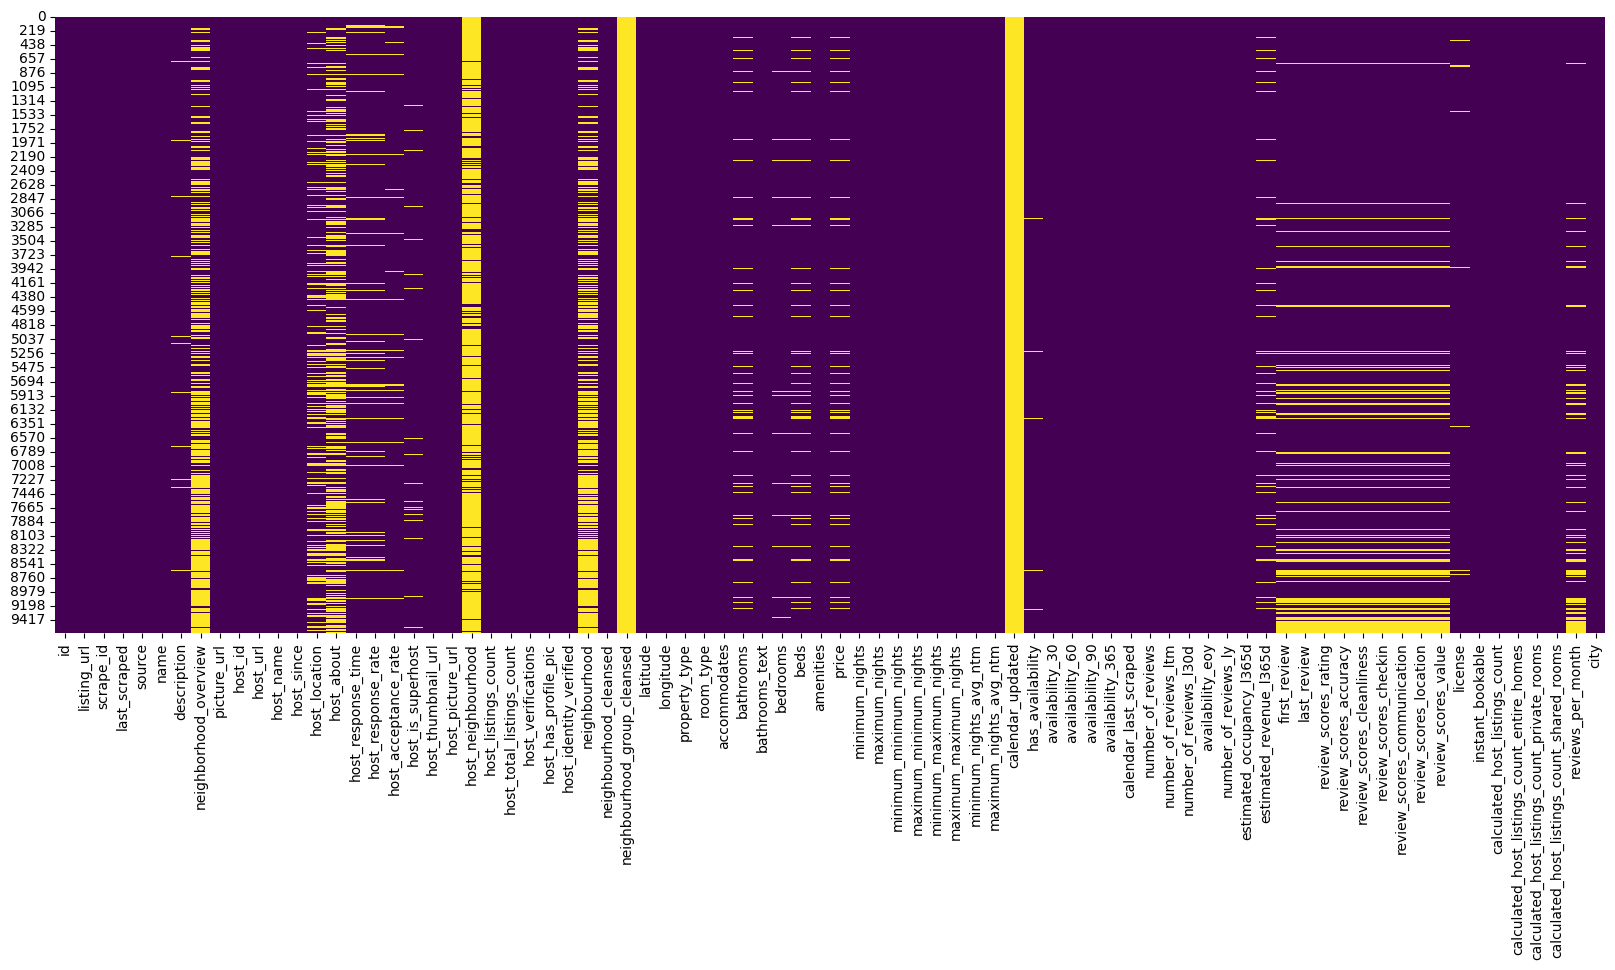

In [9]:
# Visualización de los datos nulos
plt.figure(figsize=(len(df.columns) * 0.25, 8))  # Ajusta el ancho según el número de columnas
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.xticks(rotation=90)
plt.show()

## Corrección de Tipos de Datos

Convertir columnas a los tipos de datos correctos y limpiar valores inconsistentes.

In [10]:
# Corrección de tipos de datos
def correct_data_types(df):
    # Convertir columnas de fecha
    date_cols = ['host_since', 'first_review', 'last_review', 'last_scraped', 'calendar_last_scraped']
    for col in date_cols:
        if col in df.columns:
            df[col] = pd.to_datetime(df[col], errors='coerce')

    # Convertir columnas de porcentaje
    percent_cols = ['host_response_rate', 'host_acceptance_rate']
    for col in percent_cols:
        if col in df.columns:
            df[col] = (
                df[col]
                .astype(str)
                .str.strip()
                .replace({'nan': np.nan, 'NaN': np.nan})
                .str.rstrip('%')
                .astype(float) / 100
            )

    # Convertir columnas booleanas
    bool_map = {'t': True, 'f': False}
    bool_cols = ['host_is_superhost', 'has_availability', 'instant_bookable', 'host_identity_verified']
    for col in bool_cols:
        if col in df.columns:
            df[col] = df[col].map(bool_map)

    # Limpiar y convertir columnas numéricas
    num_cols = ['price', 'estimated_revenue_l365d', 'review_scores_rating',
                'review_scores_location', 'reviews_per_month']
    for col in num_cols:
        if col in df.columns:
            df[col] = pd.to_numeric(
                df[col].replace(r'[\$,€]', '', regex=True), errors='coerce'
            )

    # Convertir columnas enteras a tipo int
    integer_cols = ['bedrooms', 'accommodates', 'beds', 'minimum_nights',
                    'maximum_nights', 'number_of_reviews', 'calculated_host_listings_count']
    for col in integer_cols:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0).astype(int)

    return df

# Aplicar la función
df = correct_data_types(df)

# Verificar tipos de datos
print("Tipos de datos después de la corrección:")
print(df.dtypes)

Tipos de datos después de la corrección:
id                                                       int64
listing_url                                             object
scrape_id                                                int64
last_scraped                                    datetime64[ns]
source                                                  object
name                                                    object
description                                             object
neighborhood_overview                                   object
picture_url                                             object
host_id                                                  int64
host_url                                                object
host_name                                               object
host_since                                      datetime64[ns]
host_location                                           object
host_about                                              object
host_response_

## Detección y Manejo de Duplicados

Identificar filas duplicadas en el dataset.

In [11]:
# Verificar duplicados
print(f"Duplicados en el dataset: {df.duplicated().sum()}")

Duplicados en el dataset: 0


In [12]:
# Eliminar columna 'neighbourhood'
# ya que 'neighbourhood_cleansed' es más precisa
if 'neighbourhood' in df.columns:
    df.drop(columns=['neighbourhood'], inplace=True)

# Renombrar columnas para consistencia
df = df.rename(columns={
    'neighbourhood_group_cleansed': 'neighbourhood_group',
    'neighbourhood_cleansed': 'neighbourhood'
})

## Manejo de Valores Nulos

El manejo de valores nulos es esencial para garantizar la calidad y consistencia del dataset. En esta sección, se implementaron estrategias específicas para rellenar valores nulos según el tipo de columna y su contexto:

1. **Columnas de Texto:**
   - Columnas como `description`, `neighborhood_overview`, `host_location`, entre otras, se rellenaron con `'no_data'` para indicar la ausencia de información.

2. **Columnas de Puntuaciones:**
   - Las columnas relacionadas con puntuaciones (`review_scores_*` y `reviews_per_month`) se rellenaron con `0`, interpretando los valores nulos como ausencia de reseñas.

3. **Columnas Numéricas:**
   - Columnas como `price`, `bedrooms`, `beds` y `bathrooms` se rellenaron con la media por grupo (`room_type` y `neighbourhood`). Si aún quedaban valores nulos, se usó la media global.

4. **Columnas Calculadas:**
   - La columna `estimated_revenue_l365d` se rellenó calculando el valor como:
     \[
     \text{estimated_revenue_l365d} = \text{price} \times \text{estimated_occupancy_l365d}
     \]

5. **Columnas de Texto Específicas:**
   - `license`: Se rellenó con `'unknown'` para indicar la ausencia de información.
   - `neighbourhood_group`: Se rellenó con el valor de `neighbourhood`, ya que no aplica en Málaga.

6. **Columnas de Porcentajes:**
   - `host_response_rate` y `host_acceptance_rate` se rellenaron con `0`, indicando que no hay datos disponibles.

7. **Columnas Booleanas:**
   - `host_is_superhost`: Se rellenó con `False` después de convertirla explícitamente al tipo `bool`.

### Validación
Después de aplicar estas estrategias, se verificaron los valores nulos restantes en el dataset para garantizar que todas las columnas relevantes estuvieran completas y listas para el análisis.

In [13]:
def handle_missing_values(df):
    # Rellenar columnas de texto con 'no_data'
    text_cols = ['description', 'neighborhood_overview', 'host_location', 'host_about', 
                 'host_neighbourhood', 'calendar_updated', 'host_response_time', 'bathrooms_text']
    df[text_cols] = df[text_cols].fillna('no_data')

    # Rellenar columnas de puntuaciones con 0
    review_score_cols = [
        'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
        'review_scores_checkin', 'review_scores_communication', 
        'review_scores_location', 'review_scores_value', 'reviews_per_month'
    ]
    df[review_score_cols] = df[review_score_cols].fillna(0)

    # Rellenar columnas numéricas con la media por grupo y luego con la media global
    numeric_cols = ['price', 'bedrooms', 'beds', 'bathrooms']
    for col in numeric_cols:
        if col in df.columns:
            # Rellenar con la media por grupo
            df[col] = df.groupby(['room_type', 'neighbourhood'])[col].transform(lambda x: x.fillna(x.mean()))
            # Rellenar con la media global si aún hay valores nulos
            df[col] = df[col].fillna(df[col].mean())

    # Rellenar 'estimated_revenue_l365d' calculando con 'price' y 'estimated_occupancy_l365d'
    if 'estimated_revenue_l365d' in df.columns and 'price' in df.columns and 'estimated_occupancy_l365d' in df.columns:
        df['estimated_revenue_l365d'] = df['estimated_revenue_l365d'].fillna(
            df['price'] * df['estimated_occupancy_l365d']
        )

    # Rellenar 'license' con 'unknown'
    if 'license' in df.columns:
        df['license'] = df['license'].fillna('unknown')

    # Rellenar 'neighbourhood_group' con 'neighbourhood' para consistencia ya que 'neighbourhood_group' no aplica en Malaga a diferencia de otros datasets
    if 'neighbourhood_group' in df.columns:
        df['neighbourhood_group'] = df['neighbourhood_group'].fillna(df['neighbourhood'])
    
    # Rellenar 'host_response_rate' y 'host_acceptance_rate' con 0
    if 'host_response_rate' in df.columns:
        df['host_response_rate'] = df['host_response_rate'].fillna(0)
    if 'host_acceptance_rate' in df.columns:
        df['host_acceptance_rate'] = df['host_acceptance_rate'].fillna(0)

    # Rellenar 'host_is_superhost' con False
    if 'host_is_superhost' in df.columns:
        # Convertir al tipo booleano antes de rellenar
        df['host_is_superhost'] = df['host_is_superhost'].astype(bool).fillna(False)

    return df
        
# Aplicar la función
df = handle_missing_values(df)

# Verificar valores nulos restantes
print("Valores nulos restantes por columna:")
print(df.isnull().sum()[df.isnull().sum() > 0])

Valores nulos restantes por columna:
has_availability      96
first_review        1167
last_review         1167
dtype: int64


## Corrección de Inconsistencias en Columnas Relevantes

En esta sección, se identificaron y corrigieron inconsistencias en las siguientes columnas:

1. **`has_availability`:**
   - Se corrigieron filas donde `has_availability` era `0` pero `availability_365` era mayor a `0`. Esto asegura que los alojamientos con noches disponibles estén marcados como disponibles.

2. **`availability_365`:**
   - Se corrigieron filas donde `estimated_occupancy_l365d` era mayor que `availability_365`. Esto asegura que el número de noches ocupadas no exceda el número total de noches disponibles.

3. **`availability_eoy`:**
   - Se corrigieron filas donde `availability_eoy` no cumplía con la relación:
     \[
     \text{availability_eoy} = \text{availability_365} - \text{estimated_occupancy_l365d}
     \]
   - Esto asegura que las noches disponibles al final del año sean consistentes con las noches totales y ocupadas.

Estas correcciones aseguran que los datos sean consistentes y reflejen la realidad del negocio.

In [14]:
def validate_zero_values(df, columns_to_check):
    """
    Valida y muestra el conteo de valores en 0 para las columnas especificadas.
    """
    zero_counts = {col: df[col].eq(0).sum() for col in columns_to_check if col in df.columns}
    print("Columnas con valores = 0:")
    for col, count_zero in zero_counts.items():
        print(f"{col}: {count_zero}")
    return zero_counts

# Aplicar la función
columns_to_check = ['has_availability', 'availability_30', 'availability_60', 'availability_90',
                    'availability_365', 'availability_eoy', 'estimated_occupancy_l365d', 'estimated_revenue_l365d']
zero_counts = validate_zero_values(df, columns_to_check)

Columnas con valores = 0:
has_availability: 0
availability_30: 2571
availability_60: 2297
availability_90: 2138
availability_365: 1723
availability_eoy: 1986
estimated_occupancy_l365d: 2130
estimated_revenue_l365d: 2130


In [15]:
# Validar la existencia de columnas necesarias antes de realizar correcciones
required_columns = ['has_availability', 'availability_365', 'availability_eoy', 'estimated_occupancy_l365d']
missing_columns = [col for col in required_columns if col not in df.columns]
if missing_columns:
    print(f"Advertencia: Las siguientes columnas no están presentes en el dataset: {missing_columns}")
else:
    # Corregir 'has_availability' basado en 'availability_365'
    df.loc[(df['has_availability'] == 0) & (df['availability_365'] > 0), 'has_availability'] = True

    # Corregir 'availability_365' basado en 'estimated_occupancy_l365d'
    df.loc[df['estimated_occupancy_l365d'] > df['availability_365'], 'availability_365'] = df['estimated_occupancy_l365d']

    # Corregir 'availability_eoy' basado en 'availability_365' y 'estimated_occupancy_l365d'
    df.loc[df['availability_eoy'] != (df['availability_365'] - df['estimated_occupancy_l365d']), 'availability_eoy'] = (
        df['availability_365'] - df['estimated_occupancy_l365d']
    )

# Verificar las correcciones realizadas
print("\nColumnas restantes con valor = 0 después de las correcciones:")
for col, count_zero in zero_counts.items():
    print(f"{col}: {df[col].eq(0).sum()}")


Columnas restantes con valor = 0 después de las correcciones:
has_availability: 0
availability_30: 2571
availability_60: 2297
availability_90: 2138
availability_365: 487
availability_eoy: 3437
estimated_occupancy_l365d: 2130
estimated_revenue_l365d: 2130


## Documentación de Valores en 0

Después del preprocesamiento, se dejaron algunos valores en `0` porque reflejan la realidad del negocio o no se dispone de información suficiente para imputarlos. Las columnas afectadas son:

1. **`has_availability`:** 71 valores en `0`. Esto indica que el alojamiento no está disponible. Estos valores son consistentes con el contexto del negocio.
2. **`availability_30`, `availability_60`, `availability_90`, `availability_365`:** Valores en `0` reflejan que el alojamiento no estuvo disponible durante esos períodos. Esto no afecta el análisis posterior.
3. **`availability_eoy`:** Valores en `0` indican que el alojamiento no estuvo disponible al final del año. Esto es consistente con la disponibilidad general.
4. **`estimated_occupancy_l365d`:** Valores en `0` reflejan que el alojamiento no tuvo ocupación en el último año.
5. **`estimated_revenue_l365d`:** Valores en `0` reflejan que el alojamiento no generó ingresos en el último año.

Estos valores se dejaron en `0` porque son consistentes con el contexto del negocio y no afectan el análisis posterior.

## Análisis y Corrección de Outliers

Los outliers pueden distorsionar el análisis y los modelos predictivos. En esta sección:

1. **Identificación de Outliers:**
   - Se identificaron outliers en las columnas `price` y `estimated_revenue_l365d` utilizando criterios basados en el contexto del negocio:
     - `price` > 80,000: Error en el formato de números (coma/punto).
     - `estimated_revenue_l365d` > 1.4 millones: Error en el precio.

2. **Corrección de Outliers:**
   - **`price`:** Los valores mayores a 80,000 se corrigieron a un valor razonable basado en la media por tipo de habitación y vecindario. Si no había suficiente información, se usó un valor predeterminado de 92.15.
   - **`estimated_revenue_l365d`:** Los valores mayores a 1.4 millones se corrigieron ajustando el precio a 900 y recalculando los ingresos estimados.

Estas correcciones aseguran que los datos sean consistentes y reflejen la realidad del negocio.

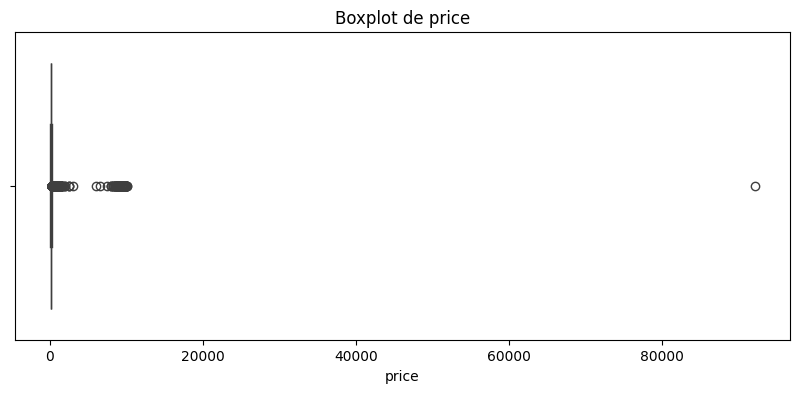

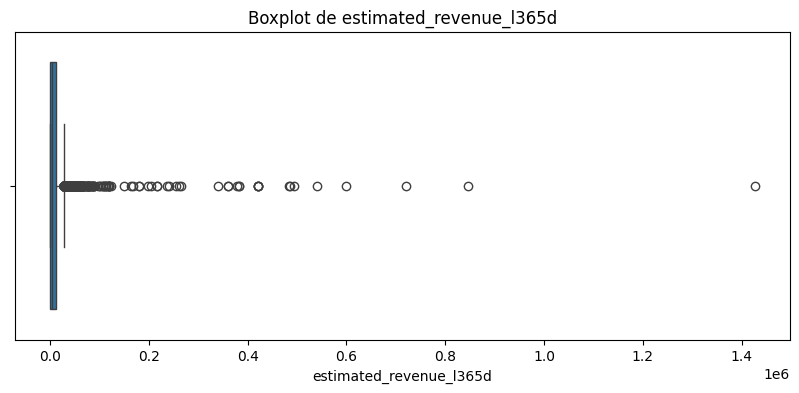

In [16]:
# Visualizar la distribución de las columnas a analizar con boxplots

columns_to_check = ['price', 'estimated_revenue_l365d']

for col in columns_to_check:
    if col in df.columns:
        plt.figure(figsize=(10, 4))
        sns.boxplot(x=df[col])
        plt.title(f'Boxplot de {col}')
        plt.xlabel(col)
        plt.show()


In [17]:
# Definir condiciones para outliers en 'price' y 'estimated_revenue_l365d'
outlier_price = (df['price'] > 1000) | (df['price'] < 0)
outlier_revenue = (df['estimated_revenue_l365d'] > 1_000_000) | (df['estimated_revenue_l365d'] < 0)

# Mostrar ambos resultados con etiquetas claras
print("Líneas donde 'price' > 1000 o < 0:")
display(df.loc[outlier_price, ['id', 'neighbourhood', 'room_type', 'price', 'estimated_revenue_l365d', 'listing_url']].head())

print("Listados con ingresos estimados anuales o 'estimated_revenue_l365d' > a 1.000.000 o < 0:")
display(df.loc[outlier_revenue, ['id', 'neighbourhood', 'room_type', 'price', 'estimated_revenue_l365d', 'listing_url']])

Líneas donde 'price' > 1000 o < 0:


,id,neighbourhood,room_type,price,estimated_revenue_l365d,listing_url
645,16630625,Centro,Entire home/apt,1472.00,35328.00,https://www.airbnb.com/rooms/16630625
748,18142622,Centro,Entire home/apt,1080.00,0.00,https://www.airbnb.com/rooms/18142622
969,20882292,Centro,Entire home/apt,9450.00,0.00,https://www.airbnb.com/rooms/20882292
1051,21911238,Este,Entire home/apt,9999.00,239976.00,https://www.airbnb.com/rooms/21911238
1139,23225280,Carretera de Cadiz,Entire home/apt,10000.00,0.00,https://www.airbnb.com/rooms/23225280


Listados con ingresos estimados anuales o 'estimated_revenue_l365d' > a 1.000.000 o < 0:


,id,neighbourhood,room_type,price,estimated_revenue_l365d,listing_url
7178,1127348509697961744,Centro,Entire home/apt,9143.00,1426308.00,https://www.airbnb.com/rooms/1127348509697961744


In [18]:
# Corregir outliers reales en 'price' y 'estimated_revenue_l365d'

# 1. Corregir precios mayores a 2000 rellenándolos con la media por 'room_type' y 'neighbourhood_cleansed'
# Calcular la media por grupo
price_means = df.groupby(['room_type', 'neighbourhood'])['price'].mean()

# Rellenar precios mayores a 2000 con la media correspondiente
df.loc[df['price'] >= 2000, 'price'] = df.loc[df['price'] >= 2000, ['room_type', 'neighbourhood']].apply(
    lambda x: price_means.loc[x['room_type'], x['neighbourhood']], axis=1
)

# 2. Recalcular 'estimated_revenue_l365d' para todas las filas con valores válidos en 'price' y 'estimated_occupancy_l365d'
df['estimated_revenue_l365d'] = df['price'] * df['estimated_occupancy_l365d']

# 3. Corregir 'estimated_revenue_l365d' > 1.4 millones (error de precio, debería ser ~900)
mask_revenue_outlier = df['estimated_revenue_l365d'] > 1_400_000
if mask_revenue_outlier.any():
    for idx in df[mask_revenue_outlier].index:
        # Asumimos que el precio correcto es 900 (según análisis manual)
        new_price = 921.50
        df.at[idx, 'price'] = new_price
        if 'estimated_occupancy_l365d' in df.columns:
            df.at[idx, 'estimated_revenue_l365d'] = new_price * df.at[idx, 'estimated_occupancy_l365d']

# Verificar las correcciones realizadas
print("Correcciones realizadas:")
print(f"Total de filas con 'price' > 2000 después de la corrección: {df[df['price'] > 2000].shape[0]}")
print(f"Total de filas con 'estimated_revenue_l365d' > 1.4 millones después de la corrección: {df[df['estimated_revenue_l365d'] > 1_400_000].shape[0]}")

Correcciones realizadas:
Total de filas con 'price' > 2000 después de la corrección: 0
Total de filas con 'estimated_revenue_l365d' > 1.4 millones después de la corrección: 0


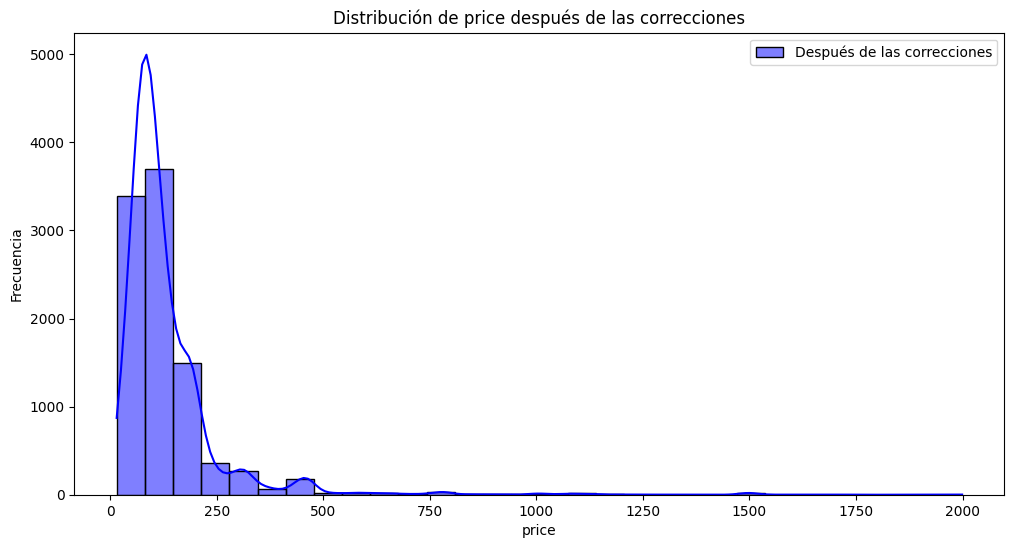

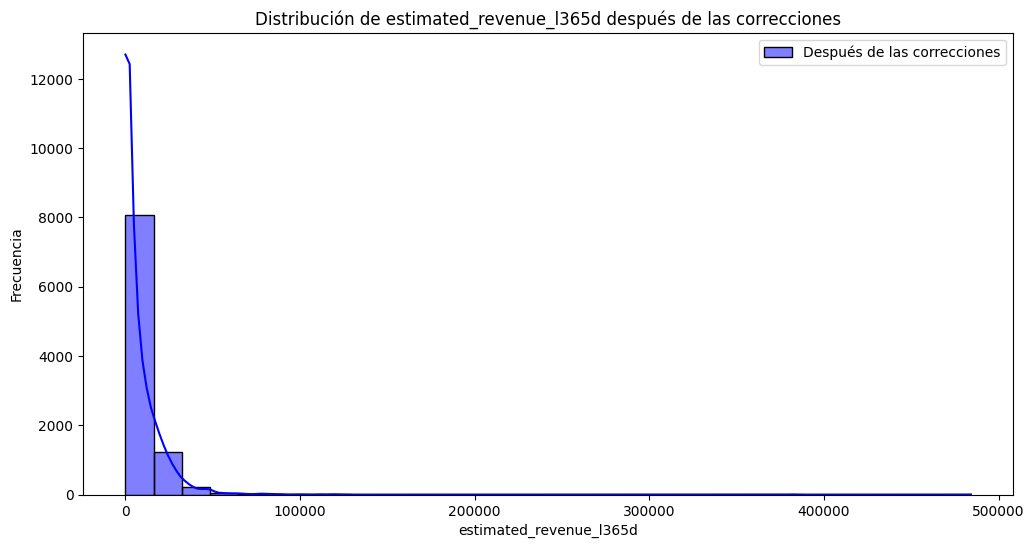

In [19]:
# Comparar distribuciones antes y después de las correcciones
columns_to_visualize = ['price', 'estimated_revenue_l365d']

for col in columns_to_visualize:
    if col in df.columns:
        plt.figure(figsize=(12, 6))
        sns.histplot(df[col], kde=True, bins=30, color='blue', label='Después de las correcciones')
        plt.title(f'Distribución de {col} después de las correcciones')
        plt.xlabel(col)
        plt.ylabel('Frecuencia')
        plt.legend()
        plt.show()

## Validación Final del Dataset

Antes de guardar el dataset limpio, se realizó una validación final para asegurarse de que los datos están listos para el análisis. Esto incluye: Revisar estadísticas descriptivas clave para garantizar que los datos son consistentes y tienen sentido.

In [20]:
# Resumen de estadísticas descriptivas clave
columns_to_check = ['price', 'availability_365', 'estimated_occupancy_l365d', 'estimated_revenue_l365d']
print("\nEstadísticas descriptivas clave:")
df[columns_to_check].describe()


Estadísticas descriptivas clave:


,price,availability_365,estimated_occupancy_l365d,estimated_revenue_l365d
count,9621.00,9621.00,9621.00,9621.00
mean,133.18,190.07,73.36,7871.16
std,131.26,109.86,85.42,13244.69
min,15.00,0.00,0.00,0.00
25%,71.00,96.00,6.00,528.00
50%,99.00,210.00,36.00,3510.00
75%,152.00,272.00,120.00,10976.00
max,1999.00,365.00,255.00,484128.00


## Exportación del Dataset Limpio

El dataset limpio se exportará a un archivo CSV para su uso en análisis posteriores. Esto asegura que los datos procesados estén disponibles para otros notebooks o herramientas de análisis.

In [21]:
# Exportar el dataset limpio
output_path = '/Users/patriciajaquez/Documents/Documents - Patricia’s MacBook Pro/GitHub/Analisis-de-inversion-inmobiliario/data/malaga_clean.csv'
df.to_csv(output_path, index=False)
print(f"Dataset limpio exportado a: {output_path}")

Dataset limpio exportado a: /Users/patriciajaquez/Documents/Documents - Patricia’s MacBook Pro/GitHub/Analisis-de-inversion-inmobiliario/data/malaga_clean.csv


## Conclusión

En este notebook, se realizó el preprocesamiento del dataset de Airbnb en Málaga. Las acciones incluyeron:

1. **Corrección de Tipos de Datos:**
   - Se corrigieron tipos de datos en columnas de fechas, porcentajes, booleanos y numéricos.

2. **Manejo de Valores Nulos:**
   - Se rellenaron valores nulos en columnas de texto, puntuaciones y booleanas.
   - Se imputaron valores nulos en columnas numéricas utilizando la media global o por grupo.

3. **Identificación y Corrección de Outliers:**
   - Se corrigieron valores atípicos en `price` y `estimated_revenue_l365d` basados en criterios del negocio.

4. **Validación Final:**
   - Se verificó que no quedaran valores nulos en columnas relevantes.
   - Se revisaron estadísticas descriptivas clave para garantizar la consistencia de los datos.

El dataset limpio se exportó para su uso en análisis posteriores. Estas acciones aseguran que los datos sean consistentes, completos y listos para el análisis de inversión inmobiliaria.